# Simulation Playground Notebook
This notebook is designed as a easy einterface to call the functions that we have defined

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import torch.optim as optim
import torch.nn as nn
import torch

from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from data_loader import load_participants_info, load_event_descriptions, load_behavioral_data, preprocess_data

# Data Preparation
Let's prepare some data first to fit our model. We are specifically using ["Locus coeruleus activity strengthens prioritized memories under arousal"](https://openneuro.org/datasets/ds002011/versions/1.0.0) dataset fror now.

In [2]:
DATASET_PATH = "data"
participants_df = load_participants_info(DATASET_PATH)
load_event_descriptions(DATASET_PATH)

df_behavior = load_behavioral_data(DATASET_PATH, "01")
for idx in range(2,11):
    sample_participant = f"0{idx}"
    df = load_behavioral_data(DATASET_PATH, sample_participant)
    df_behavior = pd.concat([df, df_behavior], ignore_index=True)

Let's preprocess our data first

In [3]:
X, Y, X_tensor, Y_tensor, scaler_X, scaler_Y, df_clean = preprocess_data(df_behavior)

df_clean

X Shape: torch.Size([1699, 7]), Y Shape: torch.Size([1699])
Y Min: -1.0, Y Max: 1.0


Condition  PreEvent_PupilMax TrialEvent    onset  duration  \
0      NEUTRAL             42.800   MoneyCue    2.117       1.0   
1      NEUTRAL             46.912      Image    5.133       2.5   
2     AROUSING             51.300   MoneyCue   14.865       1.0   
3     AROUSING             43.533      Image   21.865       2.5   
4      NEUTRAL             50.733   MoneyCue   31.580       1.0   
...        ...                ...        ...      ...       ...   
1694   NEUTRAL             40.255      Image  320.734       2.5   
1695   NEUTRAL             36.967   MoneyCue  329.566       1.0   
1696   NEUTRAL             39.533      Image  332.566       2.5   
1697  AROUSING             42.949   MoneyCue  342.381       1.0   
1698  AROUSING             41.500      Image  349.381       2.5   

      Event_PupilDilation  
0                 1.47280  
1                 7.18640  
2                -1.70980  
3                 6.13880  
4                -1.96280  
...                   ...  
1694              0.64647  
1695              0.34481  
1696              1.22080  
1697             -0.82240  
1698              2.40160  

[1699 rows x 6 columns]

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X_tensor, Y_tensor, test_size=0.2, random_state=42)

# Training

In [5]:
from train import train_feed_forward_nn, train_vanilla_rnn, train_vanilla_lc_model, train_lstm_lc_model, train_neural_gadget_model
from analysis.evaluation import evaluate_model

## Fully Connected Neural Network

To illustrate our idea, we want to train 2 models from math and computer science, which is our vanilla feed forward networks and an recurrent networks.

Epoch 0, Loss: 0.07769357413053513
Epoch 100, Loss: 0.04701070487499237
Epoch 200, Loss: 0.04485166072845459
Epoch 300, Loss: 0.04315999150276184
Epoch 400, Loss: 0.043396685272455215
Epoch 500, Loss: 0.041793931275606155
Epoch 600, Loss: 0.040724921971559525
Epoch 700, Loss: 0.040605850517749786
Epoch 800, Loss: 0.040144555270671844
Epoch 900, Loss: 0.03950908035039902
Epoch 1000, Loss: 0.039841119199991226
Epoch 1100, Loss: 0.039187923073768616
Epoch 1200, Loss: 0.03876885026693344
Epoch 1300, Loss: 0.03863535448908806
Epoch 1400, Loss: 0.039235539734363556
Epoch 1500, Loss: 0.03819841518998146
Epoch 1600, Loss: 0.03868486359715462
Epoch 1700, Loss: 0.03820470720529556
Epoch 1800, Loss: 0.03838278725743294
Epoch 1900, Loss: 0.03783269226551056
Training complete!
Evaluating Model: FeedForwardNN


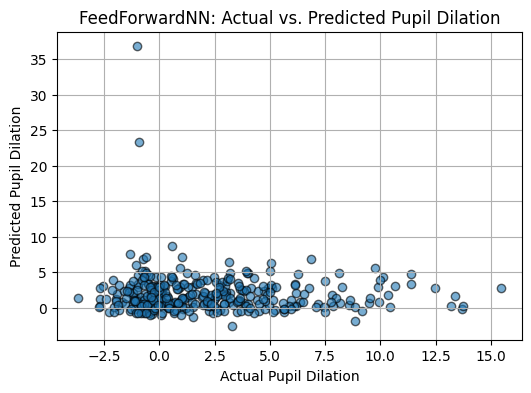

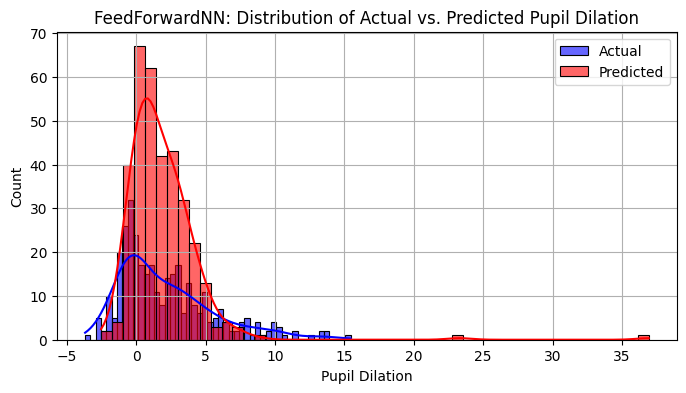

FeedForwardNN - Pearson Correlation: -0.0469


In [6]:
model_ff = train_feed_forward_nn(X_train, Y_train,epochs=2000)
evaluate_model(model_ff, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

## Recurent Neural Networks

We will  do the same thing with an recurrent neural network

X_rnn Shape: torch.Size([1359, 1, 7]), Y_rnn Shape: torch.Size([1359, 1])
Epoch 0, Loss: 0.0711
Epoch 100, Loss: 0.0513
Epoch 200, Loss: 0.0495
Epoch 300, Loss: 0.0489
Epoch 400, Loss: 0.0483
Epoch 500, Loss: 0.0488
Epoch 600, Loss: 0.0477
Epoch 700, Loss: 0.0475
Epoch 800, Loss: 0.0471
Epoch 900, Loss: 0.0472
Epoch 1000, Loss: 0.0466
Epoch 1100, Loss: 0.0464
Epoch 1200, Loss: 0.0463
Epoch 1300, Loss: 0.0467
Epoch 1400, Loss: 0.0461
Epoch 1500, Loss: 0.0460
Epoch 1600, Loss: 0.0459
Epoch 1700, Loss: 0.0459
Epoch 1800, Loss: 0.0458
Epoch 1900, Loss: 0.0457
Training complete!
Evaluating Model: RecurrentNet


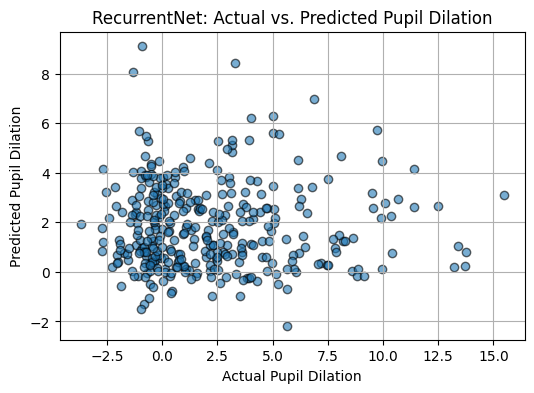

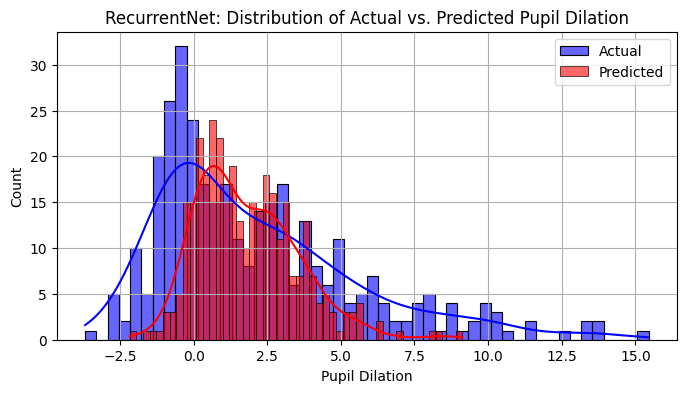

RecurrentNet - Pearson Correlation: 0.0034


In [7]:
model_rnn = train_vanilla_rnn(X_train, Y_train, epochs=2000)
evaluate_model(model_rnn, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

## Vanilla LCNECortex Model

Now coming to our customized LCNECortex model

Epoch 0, Loss: 1.058314561843872


/Users/kevinb/miniforge3/envs/cse251b/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 100, Loss: 0.0904882624745369
Epoch 200, Loss: 0.09850773960351944
Epoch 300, Loss: 0.09372051805257797
Epoch 400, Loss: 0.08009018003940582
Epoch 500, Loss: 0.05882595479488373
Epoch 600, Loss: 0.07681512087583542
Epoch 700, Loss: 0.08005741238594055
Epoch 800, Loss: 0.08554809540510178
Epoch 900, Loss: 0.07291369885206223
Epoch 1000, Loss: 0.060632750391960144
Epoch 1100, Loss: 0.10232950747013092
Epoch 1200, Loss: 0.0826156958937645
Epoch 1300, Loss: 0.08336205780506134
Epoch 1400, Loss: 0.11936328560113907
Epoch 1500, Loss: 0.09820779412984848
Epoch 1600, Loss: 0.09050829708576202
Epoch 1700, Loss: 0.08438721299171448
Epoch 1800, Loss: 0.09690515697002411
Epoch 1900, Loss: 0.06360673159360886
Training complete!
Evaluating Model: LCNECortexFitter


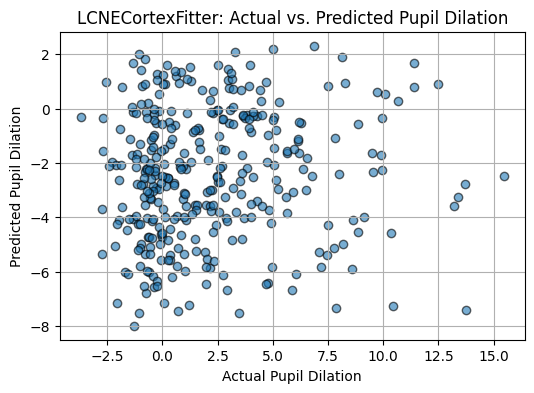

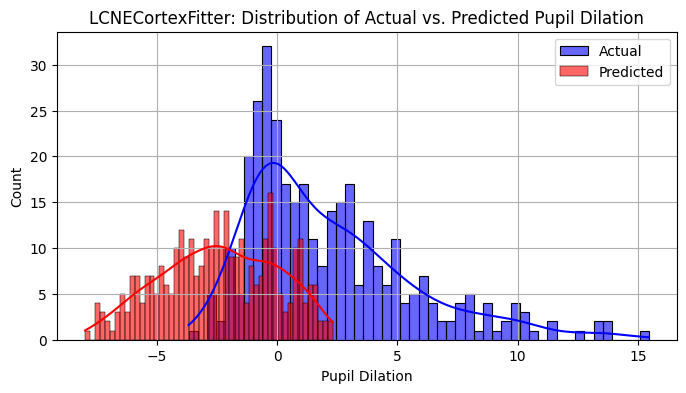

LCNECortexFitter - Pearson Correlation: 0.0735


In [8]:
model_lc_vanilla = train_vanilla_lc_model(X_train, Y_train, epochs=2000)
evaluate_model(model_lc_vanilla, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

## LSTM LCNECortex Model

Epoch 0, Loss: 0.10709675401449203


/Users/kevinb/miniforge3/envs/cse251b/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
/Users/kevinb/miniforge3/envs/cse251b/lib/python3.9/site-packages/torch/nn/modules/loss.py:1040: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)


Epoch 100, Loss: 0.02376077137887478
Epoch 200, Loss: 0.02338685840368271
Epoch 300, Loss: 0.036651965230703354
Epoch 400, Loss: 0.018685244023799896
Epoch 500, Loss: 0.022940516471862793
Epoch 600, Loss: 0.022283729165792465
Epoch 700, Loss: 0.023022381588816643
Epoch 800, Loss: 0.026064705103635788
Epoch 900, Loss: 0.03377215936779976
Epoch 1000, Loss: 0.027200665324926376
Epoch 1100, Loss: 0.023556312546133995
Epoch 1200, Loss: 0.027650056406855583
Epoch 1300, Loss: 0.05999365076422691
Epoch 1400, Loss: 0.037561651319265366
Epoch 1500, Loss: 0.02229444868862629
Epoch 1600, Loss: 0.023685500025749207
Epoch 1700, Loss: 0.025575313717126846
Epoch 1800, Loss: 0.0261689480394125
Epoch 1900, Loss: 0.03865278884768486
Training complete!
Evaluating Model: LCNECortexLSTM


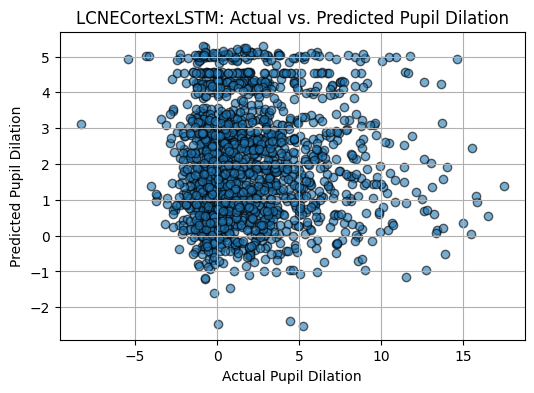

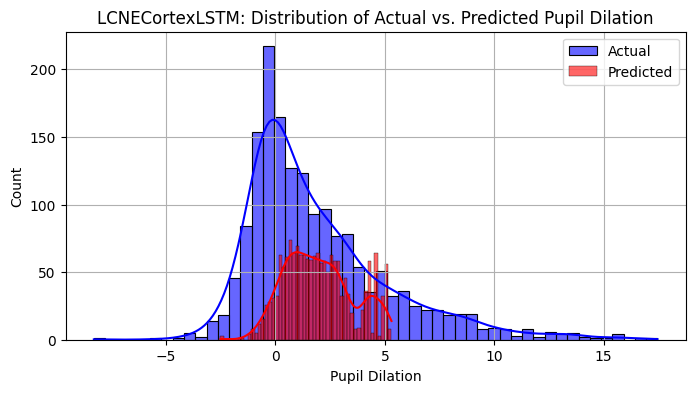

LCNECortexLSTM - Pearson Correlation: 0.0036


In [9]:
model_lc_lstm = train_lstm_lc_model(X_train, Y_train, epochs=2000, hidden_dim=64)
evaluate_model(model_lc_lstm, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

## LSTM Gadget Model

Epoch 0, Loss: 0.157399, LR: 0.001000


/Users/kevinb/miniforge3/envs/cse251b/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 100, Loss: 0.024777, LR: 0.000000
Epoch 200, Loss: 0.023341, LR: 0.000000
Epoch 300, Loss: 0.043718, LR: 0.000000
Epoch 400, Loss: 0.039110, LR: 0.000000
Epoch 500, Loss: 0.031395, LR: 0.000000
Epoch 600, Loss: 0.042081, LR: 0.000000
Epoch 700, Loss: 0.014109, LR: 0.000000
Epoch 800, Loss: 0.030426, LR: 0.000000
Epoch 900, Loss: 0.025466, LR: 0.000000
Epoch 1000, Loss: 0.035654, LR: 0.000000
Epoch 1100, Loss: 0.018127, LR: 0.000000
Epoch 1200, Loss: 0.020120, LR: 0.000000
Epoch 1300, Loss: 0.025584, LR: 0.000000
Epoch 1400, Loss: 0.016726, LR: 0.000000
Epoch 1500, Loss: 0.028220, LR: 0.000000
Epoch 1600, Loss: 0.019341, LR: 0.000000
Epoch 1700, Loss: 0.057588, LR: 0.000000
Epoch 1800, Loss: 0.043659, LR: 0.000000
Epoch 1900, Loss: 0.029697, LR: 0.000000
Training complete!
Evaluating Model: LSTMGadget


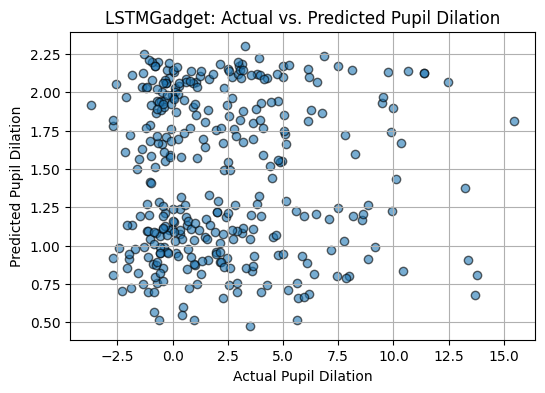

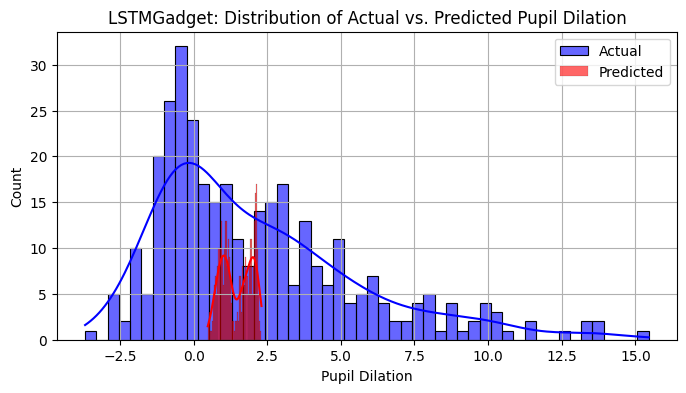

LSTMGadget - Pearson Correlation: 0.0092


In [10]:
model_gadget = train_neural_gadget_model(X_train, Y_train, epochs=2000, hidden_dim=64)
evaluate_model(model_gadget, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

Interesting results

# Analysis

In [11]:
from analysis.analysis import pca_gadget, pca_lcne_lstm, pca_feed_forward, pca_lcne, firing_lcne

## Feed-Forward Neural Networks

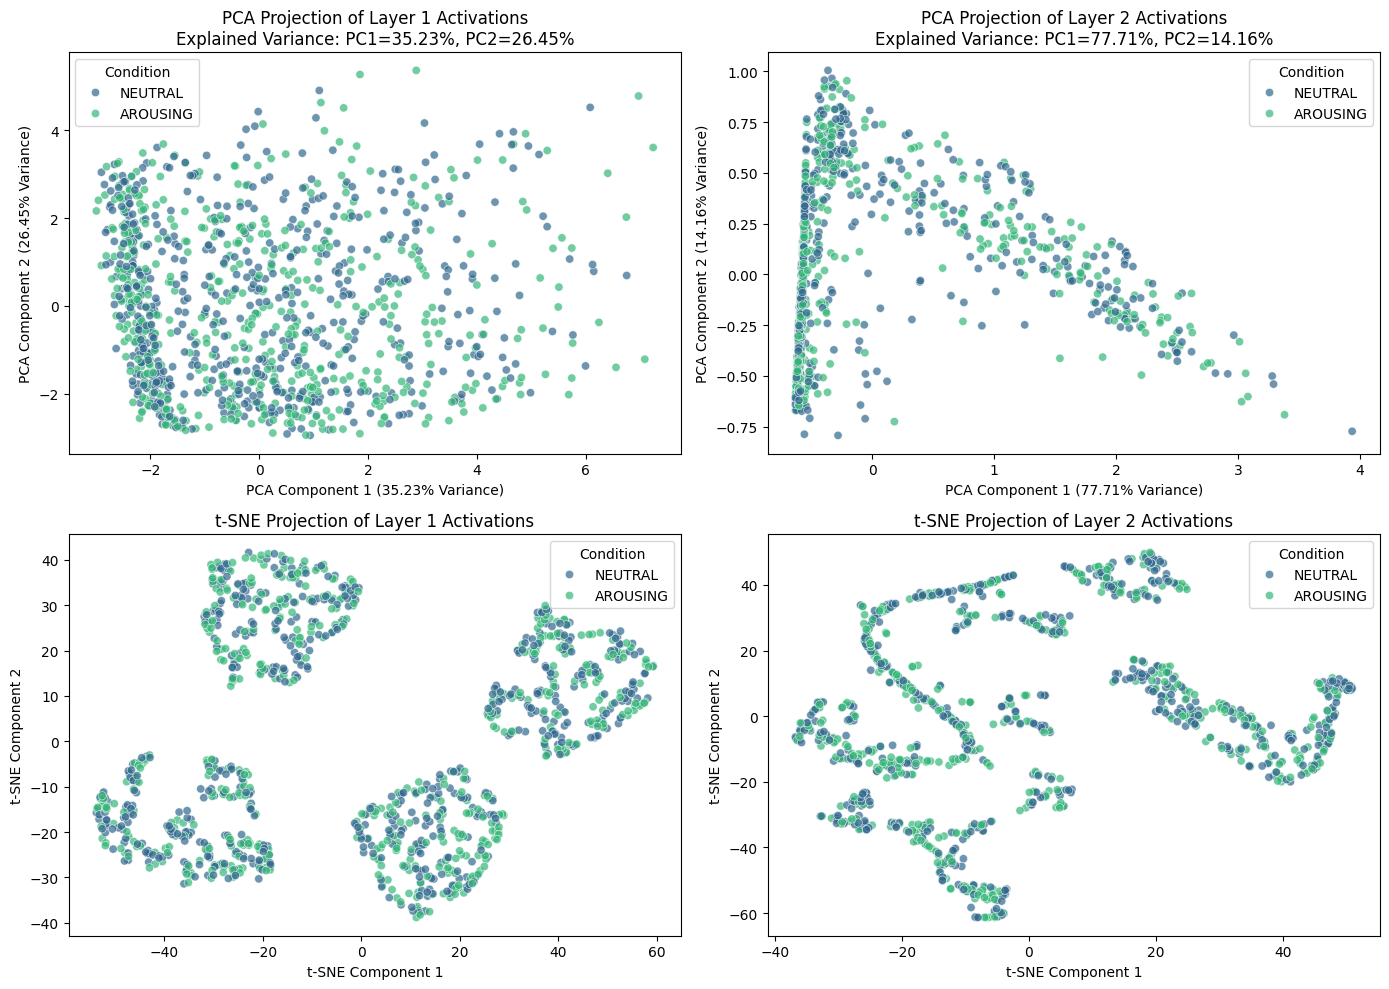

In [12]:
pca_feed_forward(model_ff, X_tensor, df_behavior)

## LCNECortex Model

We will see that, though  under fitted with the real data, there are some structureness to the data that we can play around with since we injected mechanistic insights into it.

Text(0.5, 1.0, 'Cortex Activation Distribution')

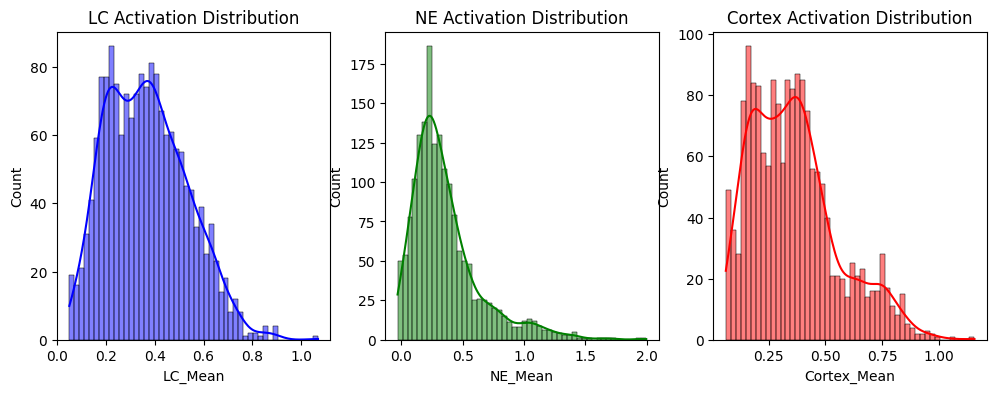

In [13]:
with torch.no_grad():
    prev_LC = torch.zeros(X_tensor.shape[0], model_lc_vanilla.hidden_dim)
    prev_Cortex = torch.zeros(X_tensor.shape[0], model_lc_vanilla.hidden_dim)

    LC_act, NE_act, C_act, Pupil_pred, LC_raw, NE_raw, C_raw = model_lc_vanilla(X_tensor, prev_LC, prev_Cortex, return_activations=True)

act_lc = LC_act.cpu().numpy()
act_ne = NE_act.cpu().numpy()
act_cortex = C_act.cpu().numpy()

df_activations = pd.DataFrame({
    'LC_Mean': act_lc.mean(axis=1),
    'NE_Mean': act_ne.mean(axis=1),
    'Cortex_Mean': act_cortex.mean(axis=1),
    'PupilPred': Pupil_pred.cpu().numpy().squeeze(),
    'ActualPupil': df_clean['Event_PupilDilation'].values  # Ensure this aligns with X_tensor
})

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df_activations['LC_Mean'], kde=True, bins=50, color='blue')
plt.title("LC Activation Distribution")

plt.subplot(1, 3, 2)
sns.histplot(df_activations['NE_Mean'], kde=True, bins=50, color='green')
plt.title("NE Activation Distribution")

plt.subplot(1, 3, 3)
sns.histplot(df_activations['Cortex_Mean'], kde=True, bins=50, color='red')
plt.title("Cortex Activation Distribution")

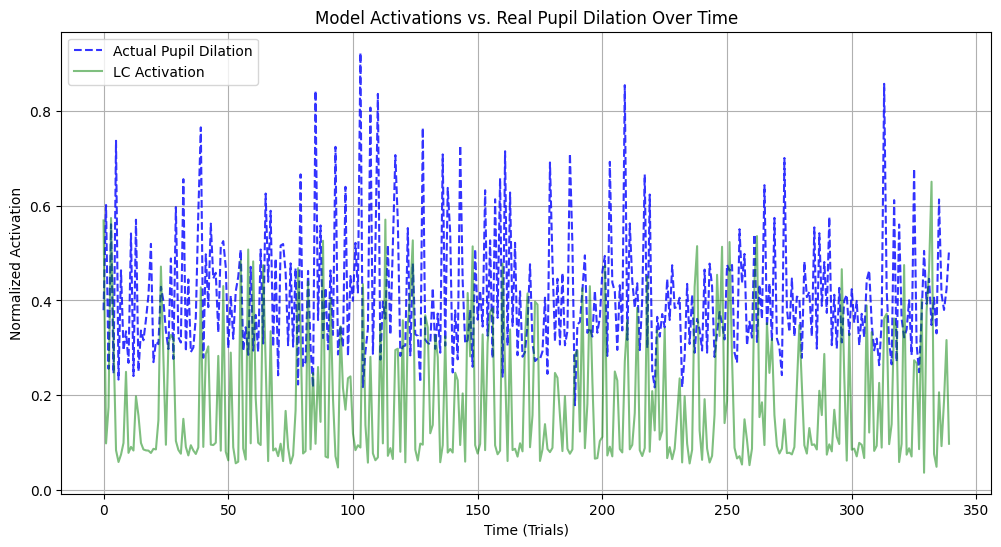

Correlation with Actual Pupil Dilation:
LC Activation: -0.051
NE Activation: 0.017
Cortex Activation: -0.025
Predicted Pupil Dilation: 0.073


In [14]:
firing_lcne(model_lc_vanilla, X_test, df_clean)

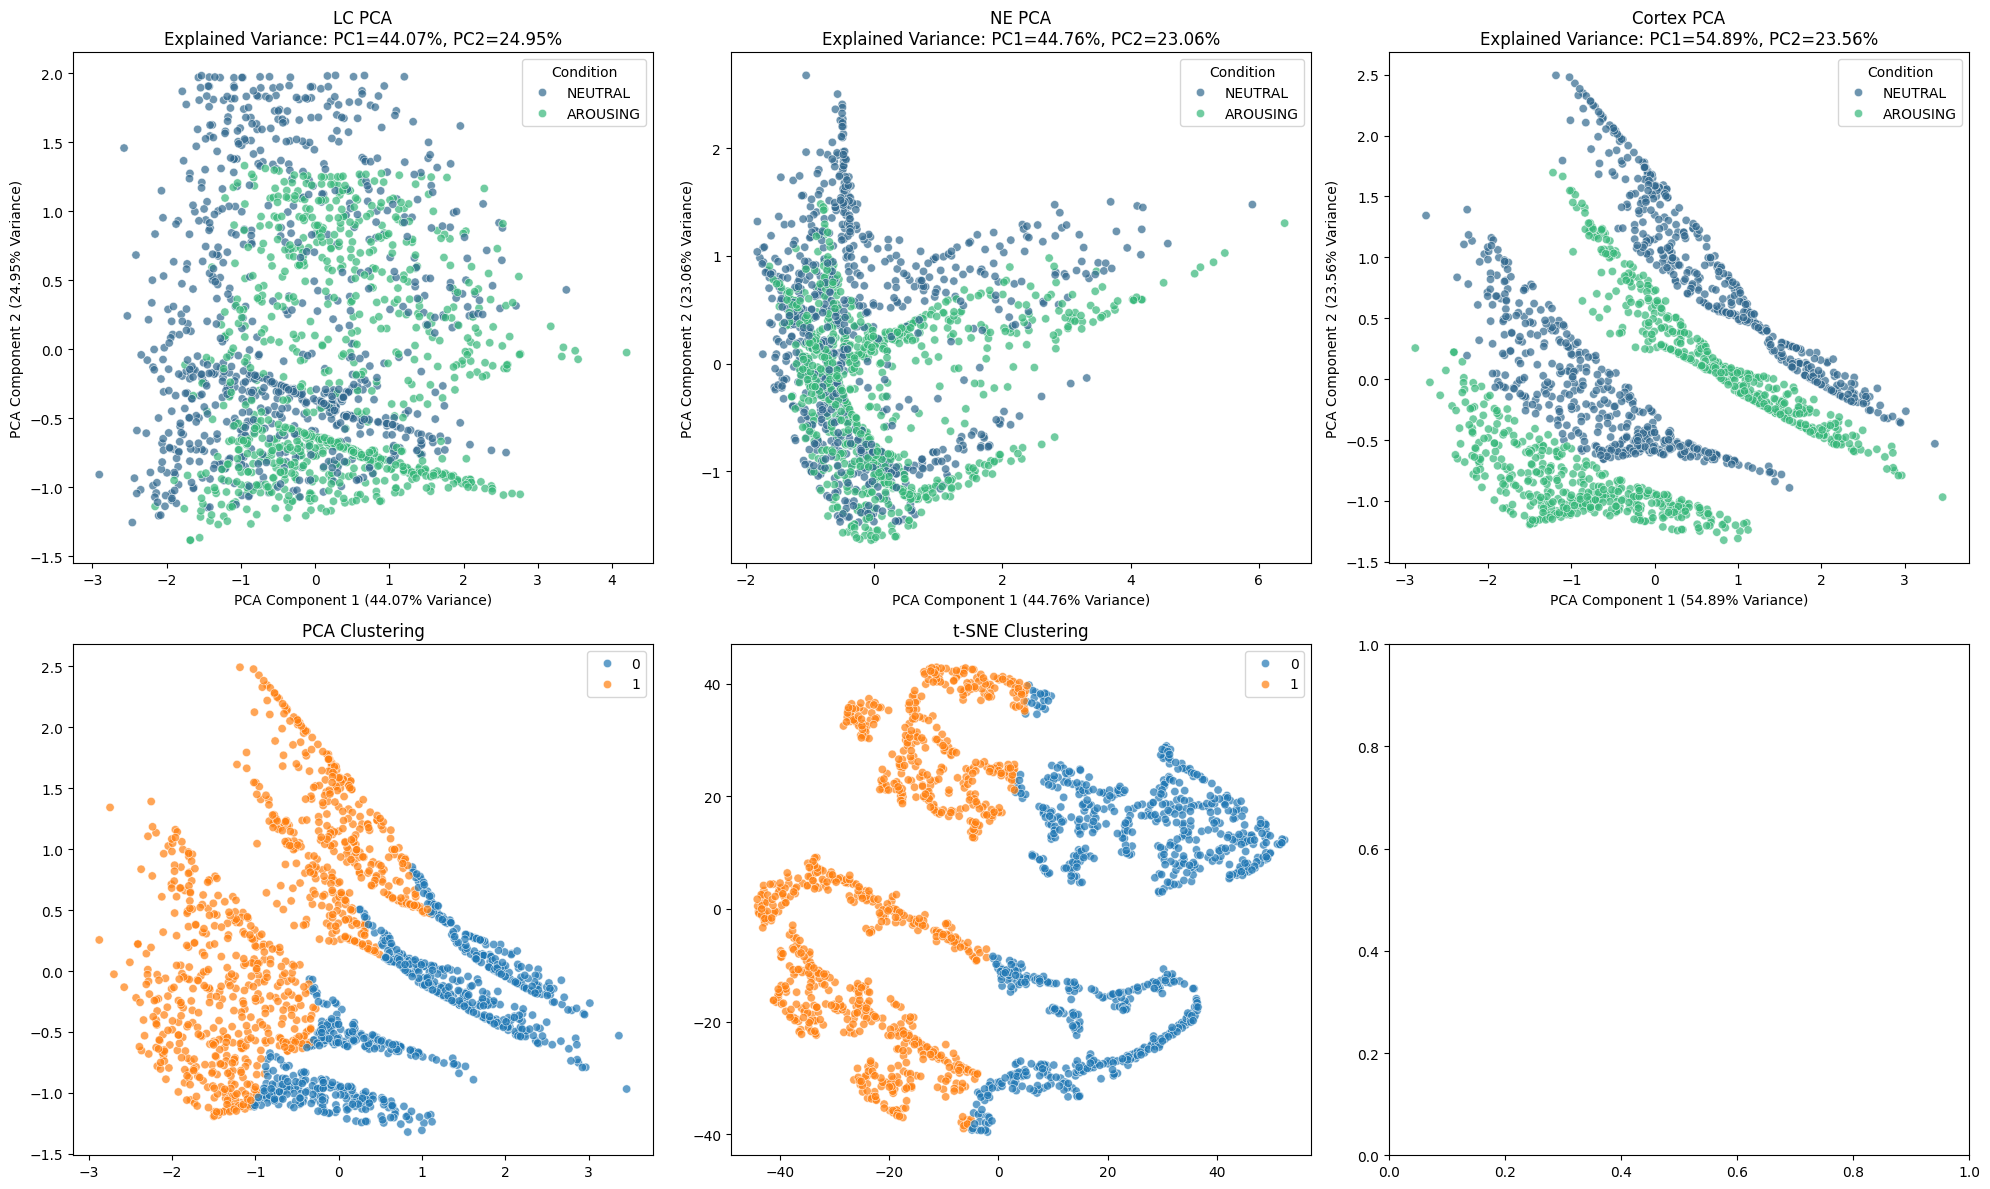

In [15]:
pca_lcne(model_lc_vanilla, X_tensor, df_clean)

## LSTM LCNECortex Model

(1699,) (1699,) (1699, 64)


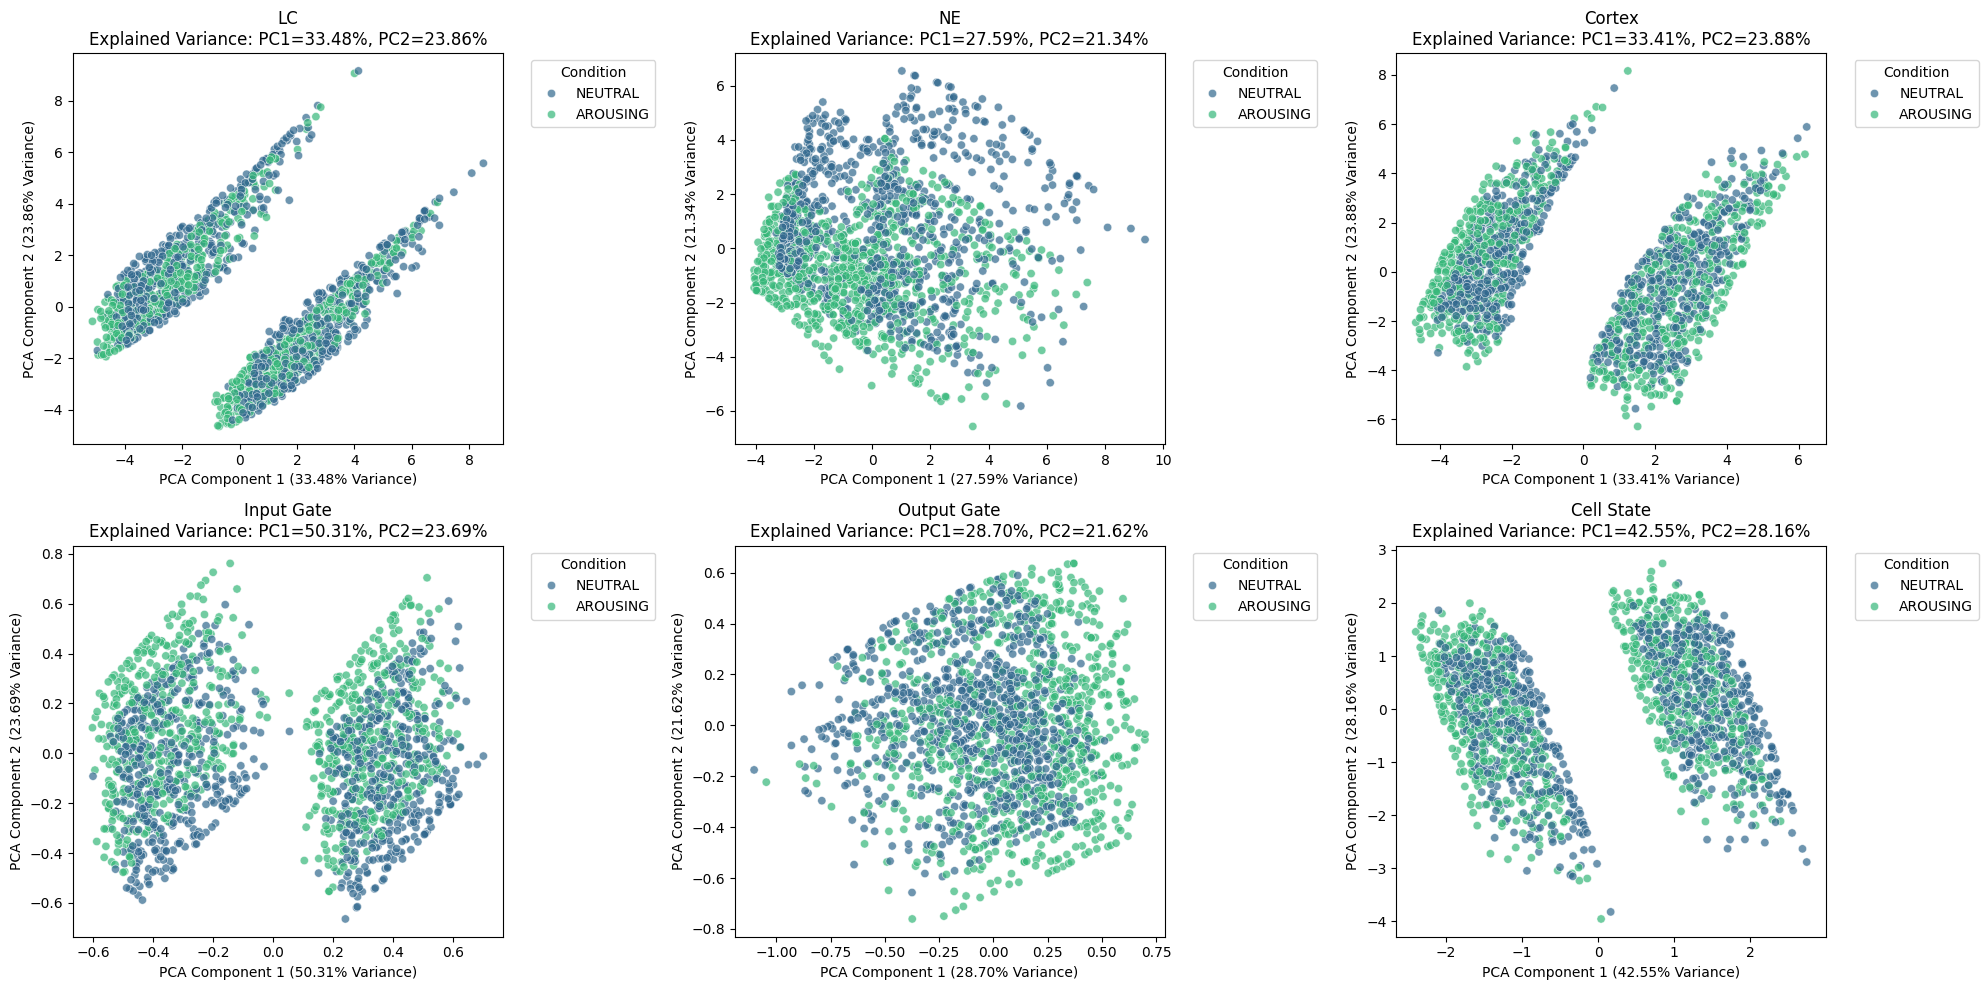

In [16]:
pca_lcne_lstm(model_lc_lstm, X_tensor, df_clean)

## LSTM Gadget Analysis

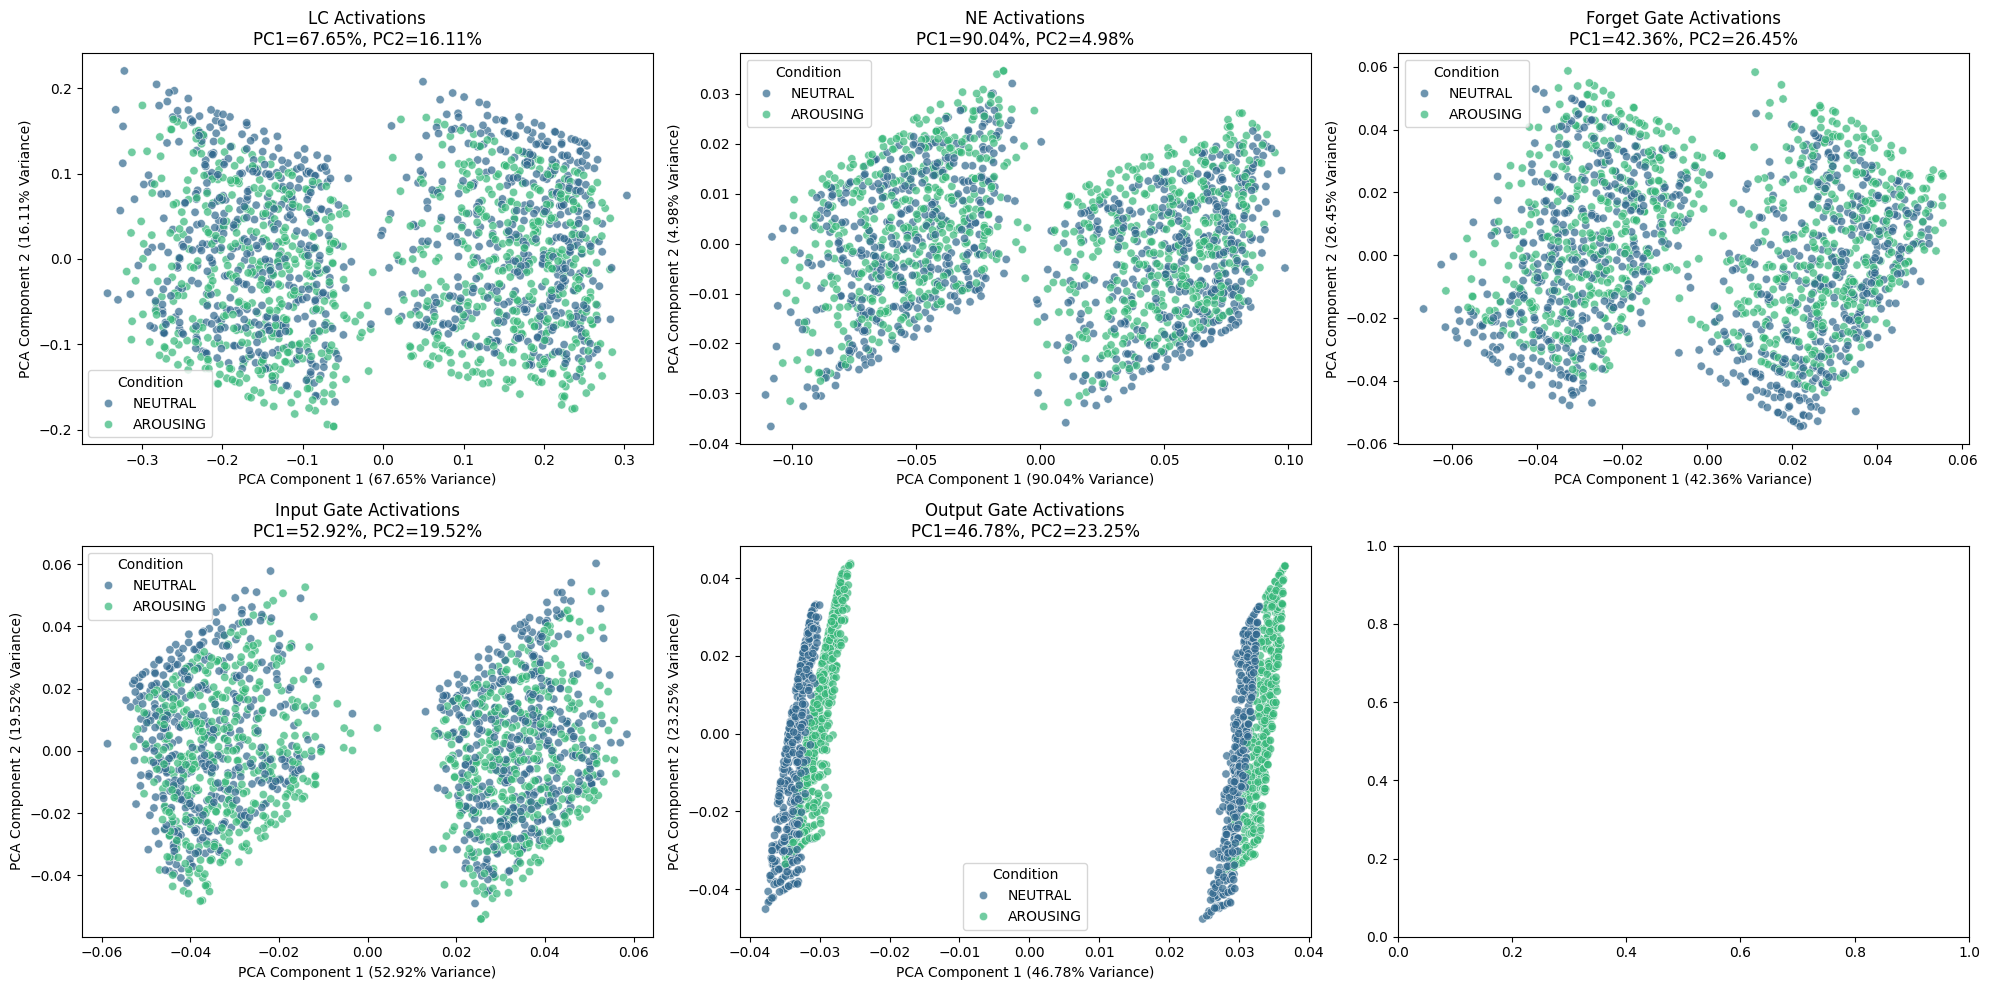

Pearson Correlation with Actual Pupil Dilation:
LC Activation: 0.374
NE Activation: 0.397
Forget Gate: -0.308
Input Gate: 0.274
Output Gate: 0.294
Predicted Pupil Dilation: 0.430


In [17]:
pca_gadget(model_gadget, X_tensor, df_clean)